In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import numpy as np

In [25]:
subprocess.run(["g++", "-o", "bar", "bar.cpp", "-lm"])
subprocess.run(["./bar"])

CompletedProcess(args=['./bar'], returncode=0)

In [26]:
df = pd.read_csv("bar_data/joint_positions.csv")
df.head()

time      x0      y0      x1      y1      x2      y2       x3      y3  \
0   0.0  2.7710  2.2787  4.7235  3.5858  8.2704  6.9200  11.4065  5.1896   
1   0.1  3.0101  1.9520  5.1138  2.9986  8.1454  6.8074  10.8233  4.4287   
2   0.2  3.2108  1.6004  5.4311  2.3693  7.8846  6.5738   9.9729  3.6638   
3   0.3  3.3707  1.2285  5.6711  1.7070  7.4957  6.2202   8.8918  2.9216   
4   0.4  3.4876  0.8409  5.8304  1.0212  6.9882  5.7496   7.6236  2.2245   

        x4  ...      y45      x46      y46      x47      y47      x48  \
0  12.7187  ...  20.8030  17.8969  24.6659  14.5473  23.3598  13.6610   
1  12.1417  ...  19.4782  21.9695  23.3432  18.7119  21.8221  17.7898   
2  11.2561  ...  17.4501  26.6522  21.3160  23.5002  19.5865  22.5437   
3  10.0992  ...  14.8791  31.6241  18.7447  28.5912  16.8140  27.6014   
4   8.7173  ...  11.9592  36.5397  15.8232  33.6387  13.6995  32.6170   

       y48      x49      y49  distance  
0  24.3464  15.9308  25.7586   30.2869  
1  22.7754  20.3588  23.5148   31.1035  
2  20.5051  25.2169  20.5155   32.5081  
3  17.6967  30.1761  16.9774   34.6241  
4  14.5451  34.8978  13.1508   37.2934  

[5 rows x 102 columns]

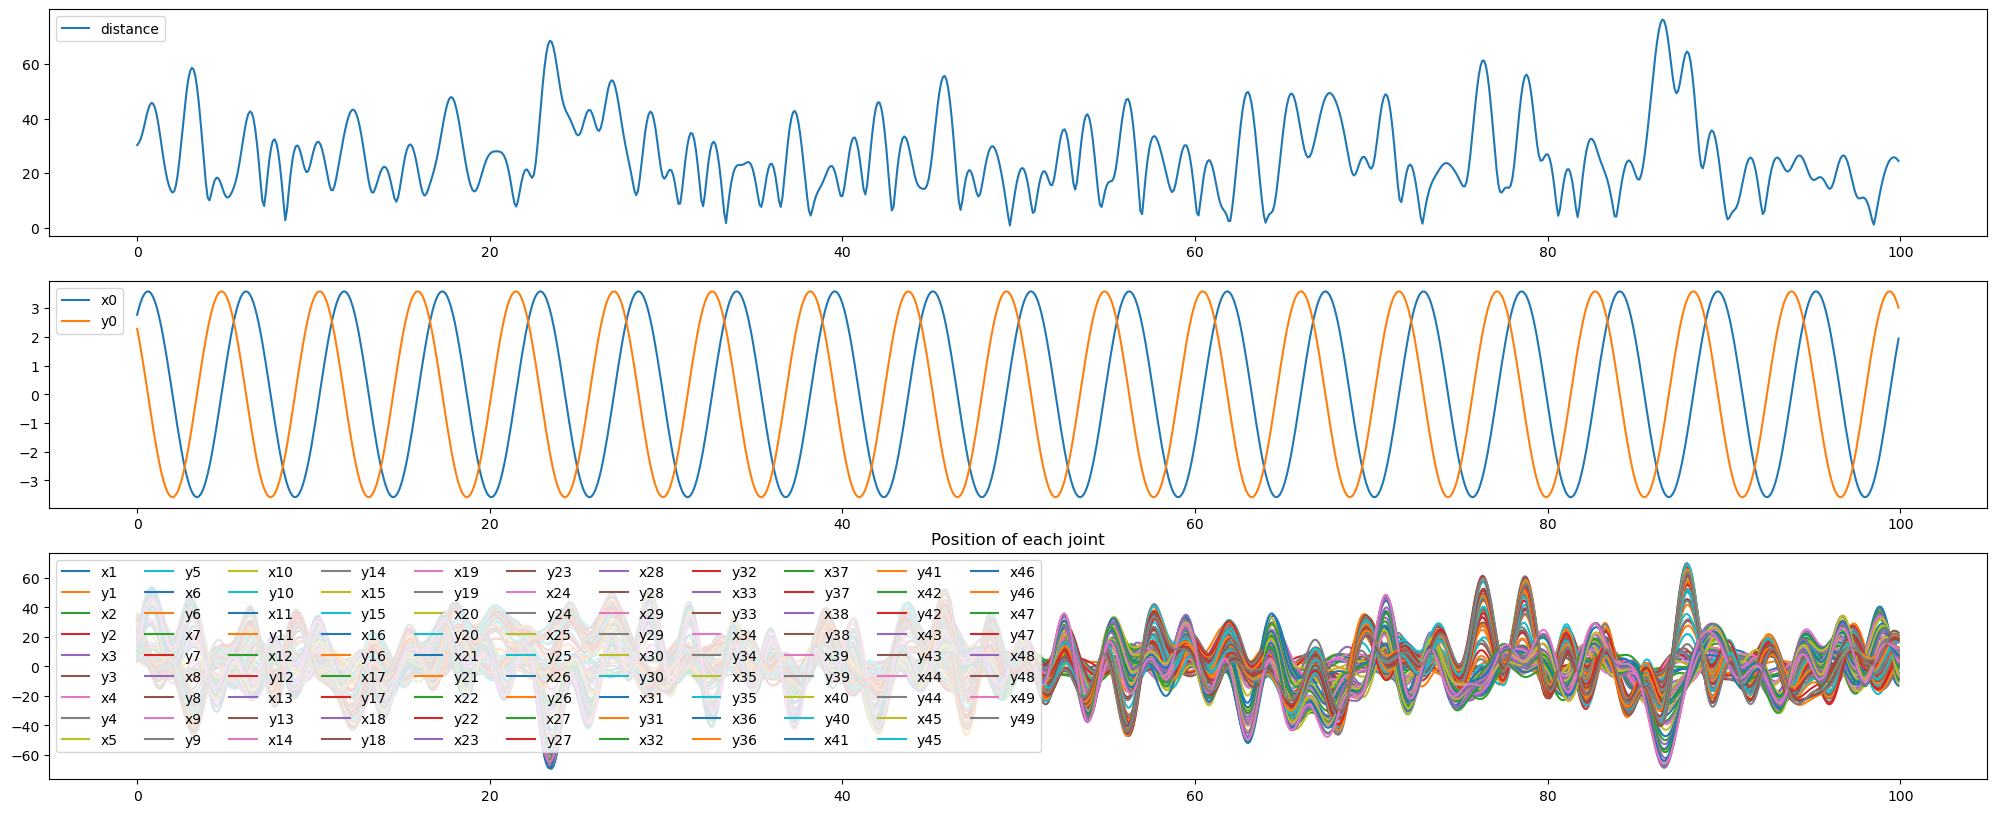

In [27]:
fig, ax = plt.subplots(figsize=(25, 10), ncols=1, nrows=3)
ax1, ax2, ax3 = ax
ax1.plot(df["time"], df["distance"], label = "distance")
ax1.legend(loc = "upper left")
headers = df.columns.tolist()
reference = headers[0]
others = headers[1:-1]
ax2.plot(df[reference], df[others[0]], label = others[0])
ax2.plot(df[reference], df[others[1]], label = others[1])
ax2.legend(loc = "upper left")
for header in others[2:]:
    ax3.plot(df[reference], df[header], label=header)
ax3.legend(loc = "upper left", ncol = int(len(headers[1:-1])/10 + 1))
plt.title("Position of each joint")
plt.show()

In [28]:
distance = pd.DataFrame()
distance["time"] = df["time"]
# Group x and y together as distance sqrt(x^2 + y^2)

for i in range(int(len(headers[1:-1])/2)):
    data_x = df["x"+str(i)]
    data_y = df["y"+str(i)]
    distance_data = np.sqrt(data_x**2 + data_y**2)
    new_header = "distance"+str(i)
    distance[new_header] = distance_data

distance.head()

time  distance0  distance1  distance2  distance3  distance4  distance5  \
0   0.0   3.587606   5.930381  10.783595  12.531568  13.794816  15.944472   
1   0.1   3.587618   5.928115  10.615472  11.694324  12.896204  14.857146   
2   0.2   3.587550   5.925405  10.265562  10.624602  11.743975  13.499077   
3   0.3   3.587594   5.922434   9.740452   9.359479  10.377204  11.911796   
4   0.4   3.587543   5.919156   9.049466   7.941516   8.842680  10.143232   

   distance6  distance7  distance8  ...  distance40  distance41  distance42  \
0  15.412912  15.990894  15.405935  ...   32.755562   35.190955   31.397062   
1  14.166856  14.916311  12.761388  ...   33.438228   36.009668   32.312418   
2  12.666408  13.597424  10.026157  ...   34.713518   37.429854   33.828019   
3  10.955022  12.078864   7.363326  ...   36.722323   39.559949   36.069191   
4   9.082881  10.413089   4.948540  ...   39.321441   42.242936   38.906793   

   distance43  distance44  distance45  distance46  distance47  distance48  \
0   27.377949   26.646200   27.540921   30.474672   27.519160   27.917201   
1   28.326034   29.007410   29.423152   32.055638   28.746117   28.899755   
2   29.919471   32.005623   31.869194   34.127872   30.592326   30.474211   
3   32.279072   35.558495   34.901514   36.762039   33.168770   32.787352   
4   35.247919   39.394323   38.331835   39.818630   36.321322   35.713144   

   distance49  
0   30.286893  
1   31.103481  
2   32.508119  
3   34.624112  
4   37.293431  

[5 rows x 51 columns]

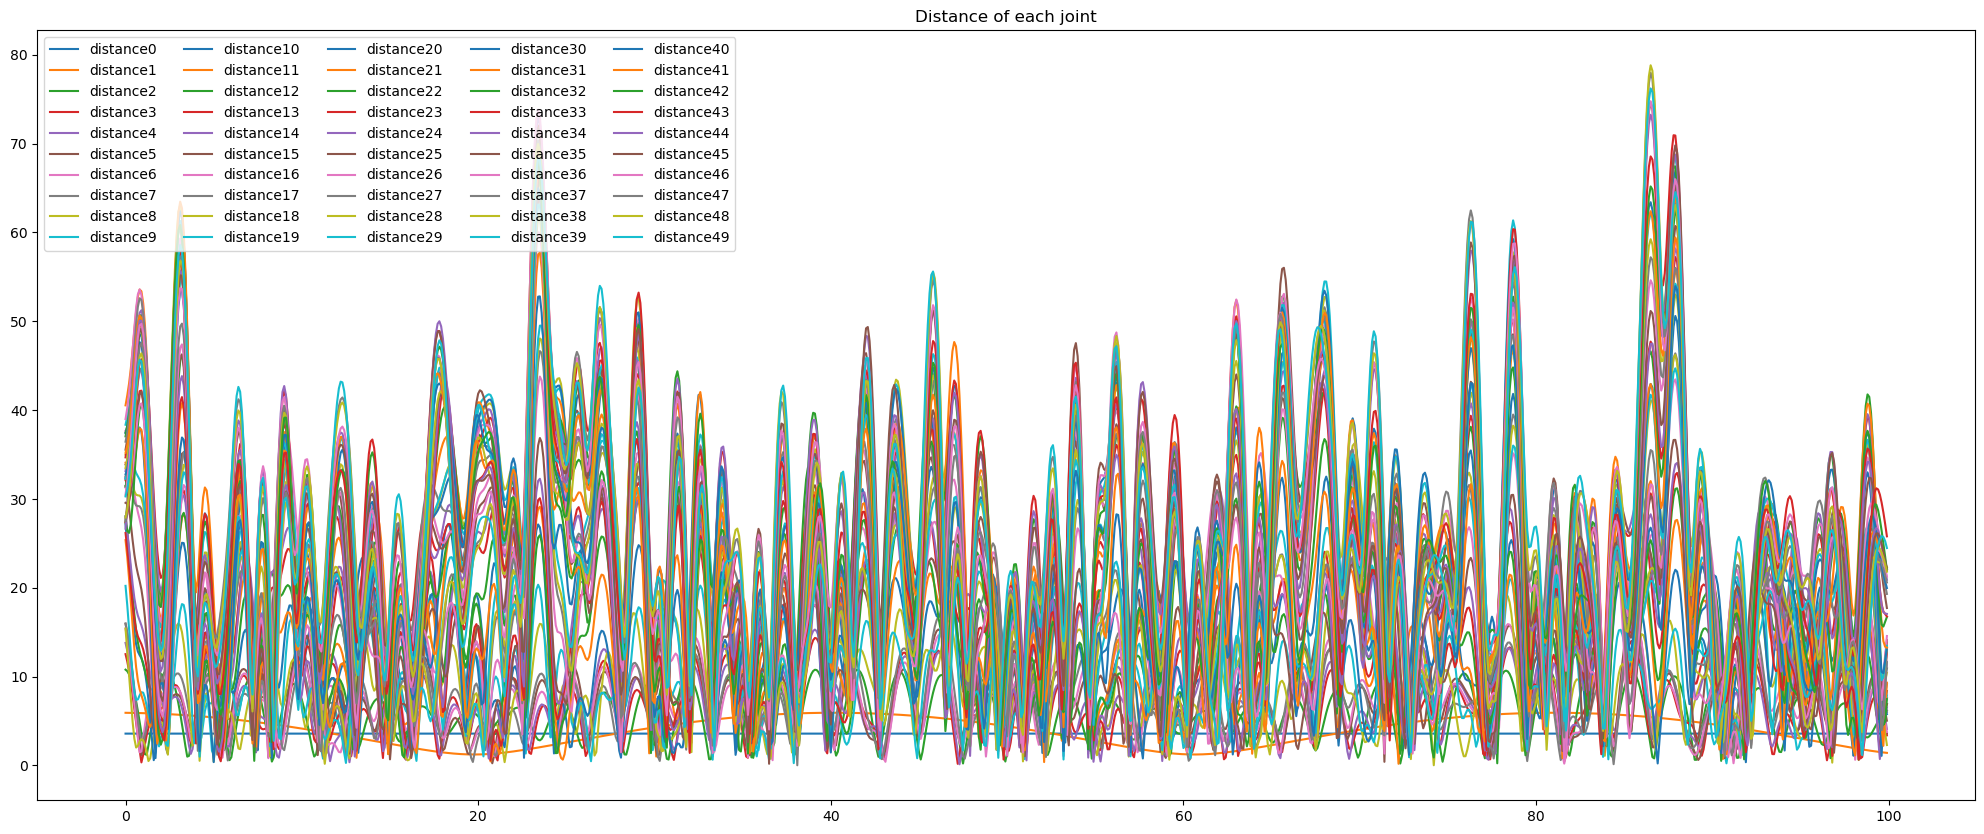

In [29]:
plt.figure(figsize=(25, 10))
headers = distance.columns.tolist()
reference = headers[0]
others = headers[1:]

for header in others:
    plt.plot(distance[reference], distance[header], label=header)
plt.legend(loc = "upper left", ncol = int(len(headers[1:-1])/10 + 1))
plt.title("Distance of each joint")
plt.show()

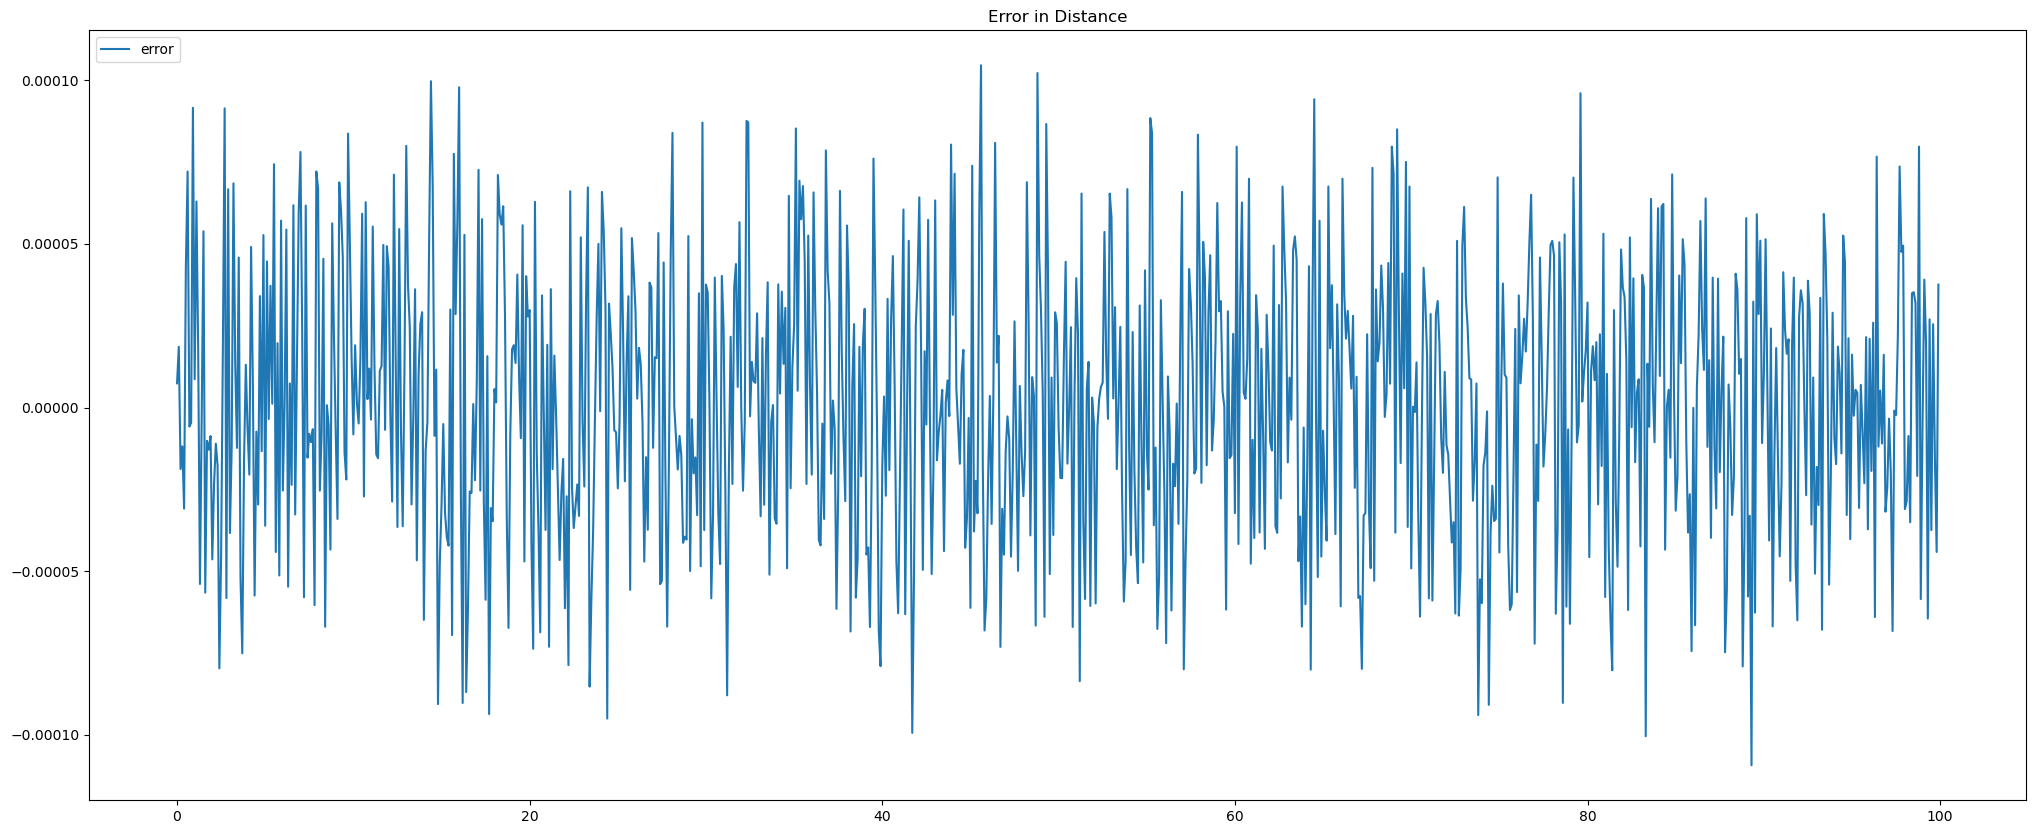

In [30]:
plt.figure(figsize=(25, 10))
plt.plot(df["time"], df.iloc[:, -1] - distance.iloc[:, -1], label="error")
plt.legend(loc = "upper left")
plt.title("Error in Distance")
plt.show()

In [31]:
num_joints = int((len(df.columns) - 2) / 2)  # subtract 'time' and 'distance' column

D1 = pd.DataFrame()
D1["time"] = df["time"]

D1["D1_0"] = np.sqrt(df["x0"]**2 + df["y0"]**2)

for i in range(num_joints - 1):
    dx = df[f"x{i+1}"] - df[f"x{i}"]
    dy = df[f"y{i+1}"] - df[f"y{i}"]
    bar = np.sqrt(dx**2 + dy**2)
    D1[f"D1_{i+1}"] = bar

D1.head()

time      D1_0      D1_1      D1_2      D1_3      D1_4      D1_5      D1_6  \
0   0.0  3.587606  2.349631  4.867996  3.581816  1.320963  2.740341  1.411410   
1   0.1  3.587618  2.349665  4.868014  3.581810  1.320966  2.740291  1.411398   
2   0.2  3.587550  2.349668  4.868006  3.581773  1.321060  2.740217  1.411432   
3   0.3  3.587594  2.349639  4.868073  3.581879  1.320905  2.740232  1.411418   
4   0.4  3.587543  2.349728  4.868087  3.581908  1.320915  2.740230  1.411330   

       D1_7      D1_8  ...     D1_40     D1_41     D1_42     D1_43     D1_44  \
0  2.295449  5.667073  ...  2.114248  3.084074  3.928750  4.025181  4.916542   
1  2.295495  5.667032  ...  2.114262  3.084140  3.928853  4.025097  4.916497   
2  2.295482  5.667089  ...  2.114332  3.084080  3.928765  4.025179  4.916504   
3  2.295554  5.667065  ...  2.114288  3.084063  3.928831  4.025086  4.916498   
4  2.295508  5.667077  ...  2.114260  3.084076  3.928763  4.025140  4.916457   

      D1_45     D1_46     D1_47     D1_48     D1_49  
0  1.398771  3.865862  3.595235  1.326238  2.673257  
1  1.398727  3.865895  3.595233  1.326292  2.673289  
2  1.398738  3.865929  3.595313  1.326167  2.673220  
3  1.398709  3.865965  3.595286  1.326221  2.673289  
4  1.398719  3.865900  3.595261  1.326239  2.673223  

[5 rows x 51 columns]

In [32]:
D1.describe()

time         D1_0         D1_1         D1_2         D1_3  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     49.950000     3.587596     2.349635     4.868035     3.581840   
std      28.881944     0.000028     0.000041     0.000042     0.000041   
min       0.000000     3.587531     2.349531     4.867933     3.581725   
25%      24.975000     3.587574     2.349605     4.868005     3.581812   
50%      49.950000     3.587597     2.349635     4.868035     3.581841   
75%      74.925000     3.587618     2.349664     4.868064     3.581869   
max      99.900000     3.587656     2.349739     4.868142     3.581954   

              D1_4         D1_5         D1_6         D1_7         D1_8  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  ...   
mean      1.320964     2.740258     1.411403     2.295490     5.667087  ...   
std       0.000042     0.000041     0.000041     0.000042     0.000041  ...   
min       1.320856     2.740131     1.411289     2.295364     5.666981  ...   
25%       1.320933     2.740229     1.411375     2.295461     5.667057  ...   
50%       1.320964     2.740256     1.411403     2.295490     5.667087  ...   
75%       1.320996     2.740288     1.411434     2.295520     5.667115  ...   
max       1.321074     2.740360     1.411512     2.295603     5.667208  ...   

             D1_40        D1_41        D1_42        D1_43        D1_44  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      2.114277     3.084102     3.928817     4.025145     4.916492   
std       0.000040     0.000041     0.000041     0.000040     0.000042   
min       2.114166     3.083996     3.928714     4.025043     4.916383   
25%       2.114248     3.084073     3.928789     4.025115     4.916462   
50%       2.114277     3.084103     3.928816     4.025146     4.916492   
75%       2.114306     3.084131     3.928847     4.025174     4.916520   
max       2.114389     3.084214     3.928937     4.025251     4.916601   

             D1_45        D1_46        D1_47        D1_48        D1_49  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean      1.398726     3.865905     3.595288     1.326216     2.673237  
std       0.000041     0.000042     0.000041     0.000042     0.000042  
min       1.398605     3.865800     3.595179     1.326088     2.673120  
25%       1.398699     3.865876     3.595258     1.326185     2.673207  
50%       1.398726     3.865904     3.595289     1.326214     2.673236  
75%       1.398756     3.865936     3.595317     1.326245     2.673267  
max       1.398829     3.866019     3.595390     1.326320     2.673354  

[8 rows x 51 columns]

In [33]:
D1.skew()

time    -2.326356e-16
D1_0    -5.997122e-02
D1_1    -3.201874e-02
D1_2    -1.279655e-02
D1_3    -1.946134e-02
D1_4    -1.786926e-02
D1_5    -2.713266e-02
D1_6     4.355331e-02
D1_7     2.079453e-02
D1_8     2.589348e-02
D1_9    -1.028903e-02
D1_10   -2.216318e-03
D1_11    1.514929e-02
D1_12   -4.064174e-02
D1_13    1.636140e-03
D1_14    1.016806e-01
D1_15   -8.932637e-02
D1_16    5.136104e-02
D1_17   -9.280428e-03
D1_18    9.790519e-03
D1_19    9.035376e-03
D1_20    1.052356e-02
D1_21   -5.777797e-02
D1_22    7.964450e-02
D1_23   -8.410627e-02
D1_24   -2.740093e-02
D1_25   -9.174824e-03
D1_26   -3.859899e-02
D1_27   -2.147135e-02
D1_28    3.506790e-02
D1_29    1.095458e-01
D1_30    1.282167e-01
D1_31    3.016453e-02
D1_32   -6.063501e-02
D1_33   -1.448052e-02
D1_34   -3.877079e-02
D1_35   -5.705504e-02
D1_36    9.072518e-02
D1_37    5.919019e-02
D1_38    2.516826e-02
D1_39    6.264038e-02
D1_40   -2.227692e-02
D1_41   -4.218814e-02
D1_42   -1.690128e-03
D1_43   -4.138892e-02
D1_44   -1

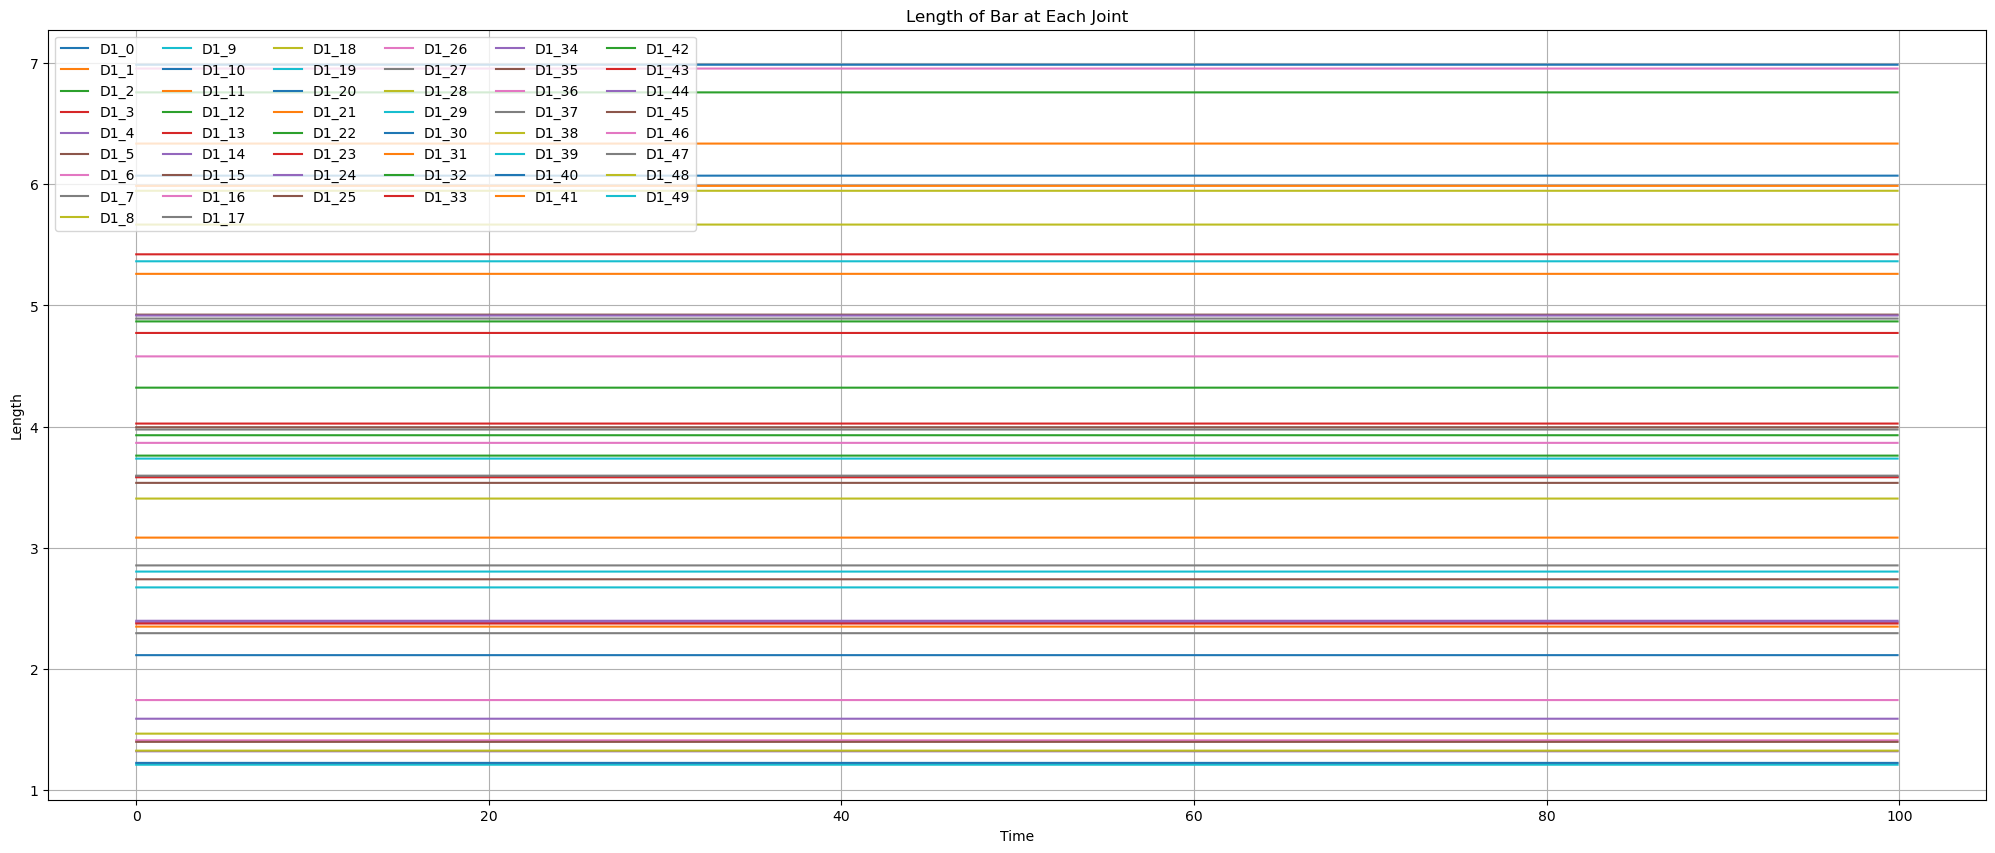

In [34]:
# Plotting
plt.figure(figsize=(25, 10))
for col in D1.columns[1:]:
    plt.plot(D1["time"], D1[col], label=col)

plt.title("Length of Bar at Each Joint")
plt.xlabel("Time")
plt.ylabel("Length")
plt.legend(loc = "upper left", ncols = int((D1.shape[1] - 1)/10 + 1))
plt.grid(True)
# plt.show()
plt.close(fig)

In [35]:
average_length_bar = []
for col in D1.columns[1:]:
    average_length_bar.append(float(D1[col].mean()))
del D1

print("Average length of bar:")
for index, value in enumerate(average_length_bar):
    print(f"Joint {index}: {value}")

Average length of bar:
Joint 0: 3.587596275065403
Joint 1: 2.3496346386954037
Joint 2: 4.86803493031721
Joint 3: 3.5818401021800366
Joint 4: 1.3209640098681639
Joint 5: 2.740257550475292
Joint 6: 1.4114034877038057
Joint 7: 2.2954902112385027
Joint 8: 5.66708651057116
Joint 9: 5.3641647139719355
Joint 10: 6.986028263741644
Joint 11: 6.335500724314788
Joint 12: 4.321342818660705
Joint 13: 4.772843022620416
Joint 14: 2.397772280627052
Joint 15: 4.924019920386181
Joint 16: 6.954458083824333
Joint 17: 4.891582012069281
Joint 18: 1.4665528164698731
Joint 19: 2.8038196183196917
Joint 20: 6.070700039333414
Joint 21: 5.260496556221756
Joint 22: 6.7578987849501635
Joint 23: 5.421709432607293
Joint 24: 2.3865198491581974
Joint 25: 3.5357849796927363
Joint 26: 1.7436399807246379
Joint 27: 3.9759912452126605
Joint 28: 5.945983694881633
Joint 29: 1.2102478060978465
Joint 30: 1.2251534025504847
Joint 31: 5.9864443214752505
Joint 32: 3.7606569809682435
Joint 33: 2.375298877318664
Joint 34: 1.58963367

In [36]:
D2 = pd.DataFrame()
D2["time"] = df["time"]

D2["angle0"] = np.arctan2(df["y0"] , df["x0"])
for i in range(num_joints - 1):
    dx = df[f"x{i+1}"] - df[f"x{i}"]
    dy = df[f"y{i+1}"] - df[f"y{i}"]
    distance = np.sqrt(dx**2 + dy**2)
    D2[f"angle{i+1}"] = np.arctan2(dy, dx)

D2.head()

time    angle0    angle1    angle2    angle3    angle4    angle5    angle6  \
0   0.0  0.688214  0.589927  0.754497 -0.504200  0.115247  1.125999  2.510562   
1   0.1  0.575308  0.461649  0.898532 -0.726297 -0.062343  1.188725  2.605924   
2   0.2  0.462401  0.333379  1.042567 -0.948337 -0.239985  1.251481  2.701267   
3   0.3  0.349502  0.205083  1.186605 -1.170417 -0.417586  1.314178  2.796696   
4   0.4  0.236596  0.076808  1.330660 -1.392461 -0.595289  1.376936  2.892008   

     angle7    angle8  ...   angle40   angle41   angle42   angle43   angle44  \
0  1.983416  2.590372  ...  2.339873  0.340413 -2.415876 -2.086041 -0.812958   
1  1.880906  2.860935  ...  2.071426  0.266457 -2.640430 -2.145445 -0.669462   
2  1.778385  3.131499  ...  1.802973  0.192525 -2.864964 -2.204857 -0.525960   
3  1.675844 -2.881116  ...  1.534559  0.118596 -3.089493 -2.264275 -0.382448   
4  1.573367 -2.610549  ...  1.266142  0.044664  2.969159 -2.323689 -0.238921   

    angle45   angle46   angle47   angle48   angle49  
0  1.713260  1.609944 -2.769800  2.302692  0.556561  
1  1.969718  1.592320 -2.704742  2.339560  0.280242  
2  2.226108  1.574676 -2.639749  2.376404  0.003890  
3  2.482562  1.557061 -2.574706  2.413329 -0.272427  
4  2.739020  1.539440 -2.509674  2.450224 -0.548702  

[5 rows x 51 columns]

In [37]:
# Compare angles with real data
angle_data = pd.read_csv("bar_data/joint_angles.csv")
angle_data.head()

time  angle0  angle1  angle2  angle3  angle4  angle5  angle6  angle7  \
0   0.0  0.6882  0.5899  0.7545 -0.5042  0.1153  1.1260  2.5106  1.9834   
1   0.1  0.5753  0.4617  0.8985 -0.7263 -0.0623  1.1887  2.6059  1.8809   
2   0.2  0.4624  0.3334  1.0426 -0.9483 -0.2400  1.2515  2.7013  1.7784   
3   0.3  0.3495  0.2051  1.1866 -1.1704 -0.4176  1.3142  2.7967  1.6759   
4   0.4  0.2366  0.0768  1.3306 -1.3925 -0.5953  1.3769  2.8921  1.5733   

   angle8  ...  angle41  angle42  angle43  angle44  angle45  angle46  angle47  \
0  2.5904  ...   0.3404  -2.4159  -2.0860  -0.8130   1.7133   1.6099  -2.7698   
1  2.8609  ...   0.2665  -2.6404  -2.1454  -0.6695   1.9697   1.5923  -2.7048   
2  3.1315  ...   0.1925  -2.8650  -2.2049  -0.5260   2.2261   1.5747  -2.6397   
3 -2.8811  ...   0.1186  -3.0895  -2.2643  -0.3824   2.4826   1.5571  -2.5747   
4 -2.6106  ...   0.0447   2.9692  -2.3237  -0.2389   2.7390   1.5394  -2.5097   

   angle48  angle49  distance  
0   2.3026   0.5565   30.2869  
1   2.3395   0.2802   31.1035  
2   2.3764   0.0039   32.5081  
3   2.4133  -0.2724   34.6241  
4   2.4502  -0.5487   37.2934  

[5 rows x 52 columns]

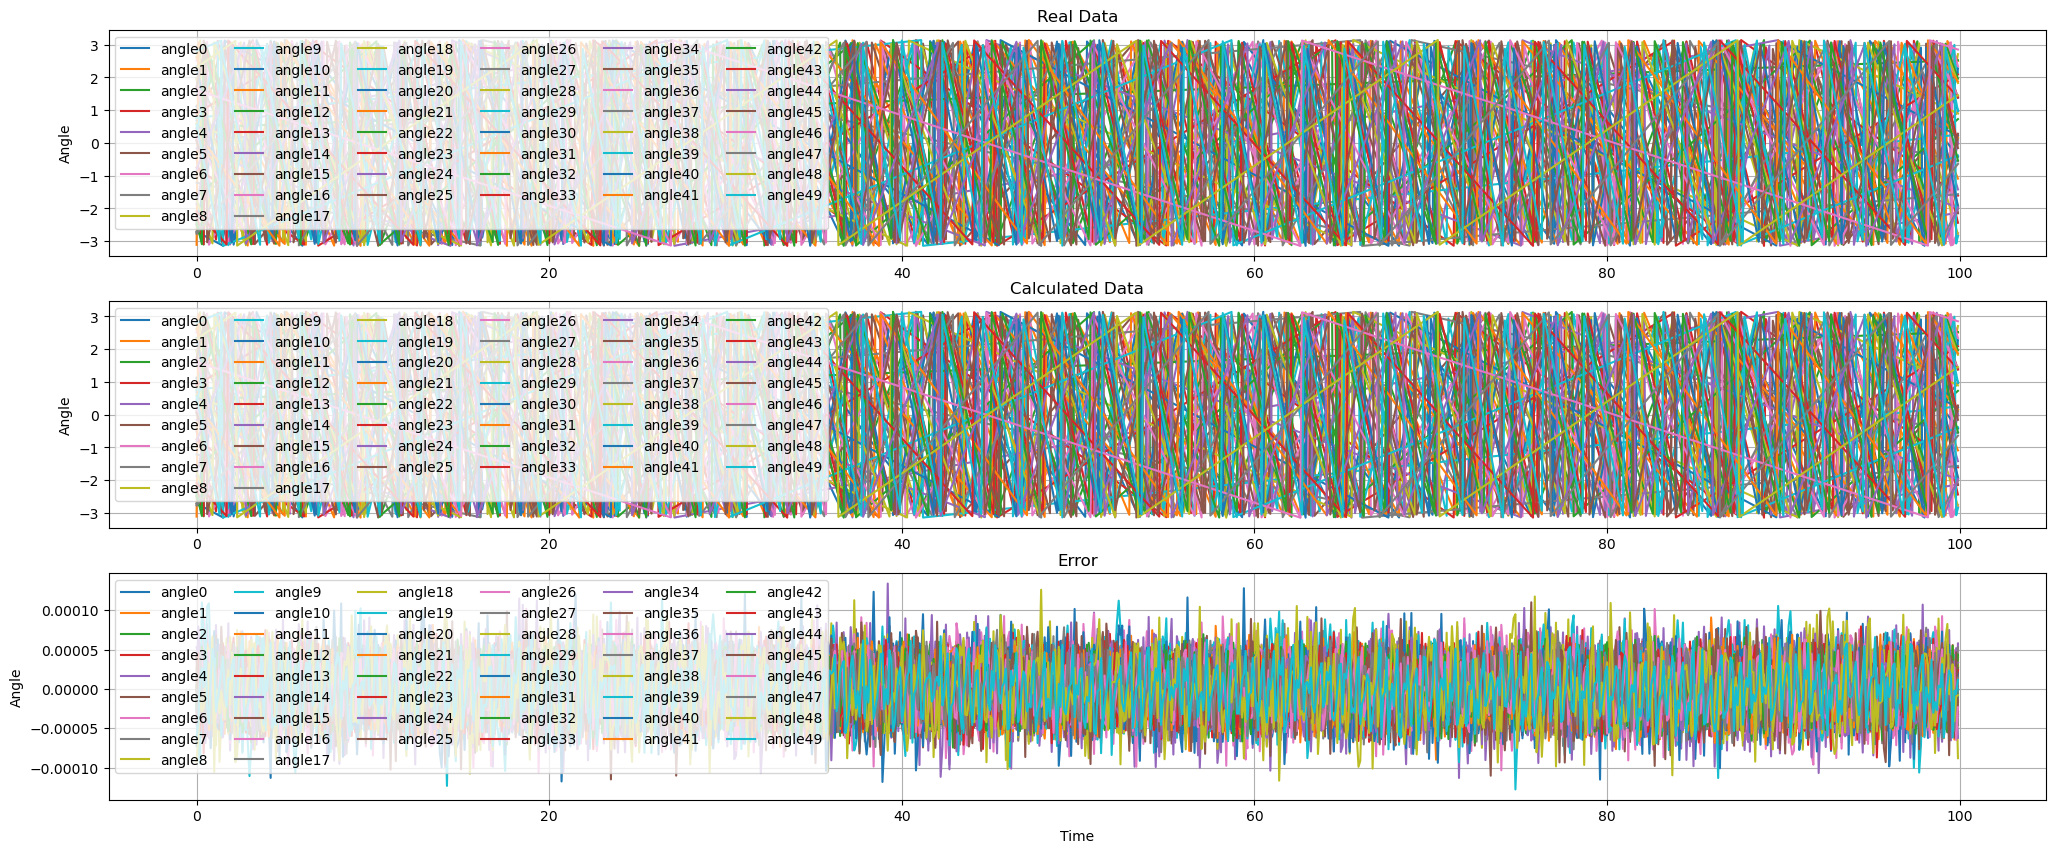

In [38]:
fig, ax = plt.subplots(figsize=(25, 10), ncols=1, nrows=3)
ax1, ax2, ax3 = ax

for i in range(num_joints):
    ax1.plot(angle_data["time"], angle_data[f"angle{i}"], label = f"angle{i}")
    ax1.legend(loc = "upper left", ncols = int(num_joints/10 + 1))
    ax2.plot(D2["time"], D2[f"angle{i}"], label = f"angle{i}")
    ax2.legend(loc = "upper left", ncols = int(num_joints/10 + 1))
    ax3.plot(angle_data["time"], angle_data[f"angle{i}"] - D2[f"angle{i}"], label = f"angle{i}")
    ax3.legend(loc = "upper left", ncols = int(num_joints/10 + 1))

ax1.set_title("Real Data")
ax1.set_ylabel("Angle")
ax1.grid(True)

ax2.set_title("Calculated Data")
ax2.set_ylabel("Angle")
ax2.grid(True)

ax3.set_title("Error")
ax3.set_ylabel("Angle")
ax3.grid(True)

plt.xlabel("Time")
plt.show()

In [39]:
# Rebuild the model
reconstruct = pd.DataFrame()

reconstruct["time"] = df["time"]

for row in D2.index:
    x = 0
    y = 0
    for i in range(num_joints):
        x += average_length_bar[i] * np.cos(D2[f"angle{i}"][row])
        y += average_length_bar[i] * np.sin(D2[f"angle{i}"][row])
    reconstruct.loc[row, "x"] = x
    reconstruct.loc[row, "y"] = y
    reconstruct.loc[row, "distance"] = np.sqrt(x**2 + y**2)

reconstruct["x error"] = reconstruct["x"] - df[f"x{len(average_length_bar)-1}"]
reconstruct["y error"] = reconstruct["y"] - df[f"y{len(average_length_bar)-1}"]
reconstruct["error distance"] = reconstruct["distance"] - df["distance"]

reconstruct["x error %"] = np.where(
    df[f"x{len(average_length_bar)-1}"] != 0,
    (reconstruct["x error"] / df[f"x{len(average_length_bar)-1}"]) * 100,
    0
)

reconstruct["y error %"] = np.where(
    df[f"y{len(average_length_bar)-1}"] != 0,
    (reconstruct["y error"] / df[f"y{len(average_length_bar)-1}"]) * 100,
    0
)

reconstruct["distance error %"] = np.where(
    df["distance"] != 0,
    (reconstruct["error distance"] / df["distance"]) * 100,
    0
)

reconstruct.head()

time          x          y   distance   x error   y error  error distance  \
0   0.0  15.930672  25.758331  30.286596 -0.000128 -0.000269       -0.000304   
1   0.1  20.358522  23.514631  31.103172 -0.000278 -0.000169       -0.000328   
2   0.2  25.216929  20.515490  32.508135  0.000029 -0.000010        0.000035   
3   0.3  30.176159  16.977444  34.624185  0.000059  0.000044        0.000085   
4   0.4  34.897762  13.150891  37.293427 -0.000038  0.000091        0.000027   

   x error %  y error %  distance error %  
0  -0.000804  -0.001044         -0.001002  
1  -0.001367  -0.000717         -0.001055  
2   0.000116  -0.000051          0.000107  
3   0.000194   0.000262          0.000244  
4  -0.000110   0.000690          0.000072

In [40]:
reconstruct.describe()

time            x            y     distance       x error  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1.000000e+03   
mean     49.950000    -1.075263     4.181942    26.039587 -3.349576e-06   
std      28.881944    20.929404    20.386656    13.913316  1.428106e-04   
min       0.000000   -66.221235   -46.684926     0.863639 -4.569906e-04   
25%      24.975000   -12.531413   -10.030276    16.266578 -9.298385e-05   
50%      49.950000     0.601385     3.544572    23.201678  1.254392e-07   
75%      74.925000    13.004727    17.267821    33.608202  8.529776e-05   
max      99.900000    48.699734    63.714094    76.203916  5.056595e-04   

           y error  error distance    x error %    y error %  distance error %  
count  1000.000000    1.000000e+03  1000.000000  1000.000000       1000.000000  
mean     -0.000007    1.835997e-07     0.000677    -0.074558          0.000050  
std       0.000142    1.489260e-04     0.040611     2.334586          0.001266  
min      -0.000442   -5.142728e-04    -0.622904   -73.817996         -0.007619  
25%      -0.000098   -9.243429e-05    -0.000656    -0.000679         -0.000391  
50%      -0.000010   -4.563718e-06    -0.000027    -0.000020         -0.000018  
75%       0.000088    9.439563e-05     0.000688     0.000690          0.000406  
max       0.000439    4.859903e-04     1.019729     0.565645          0.014728

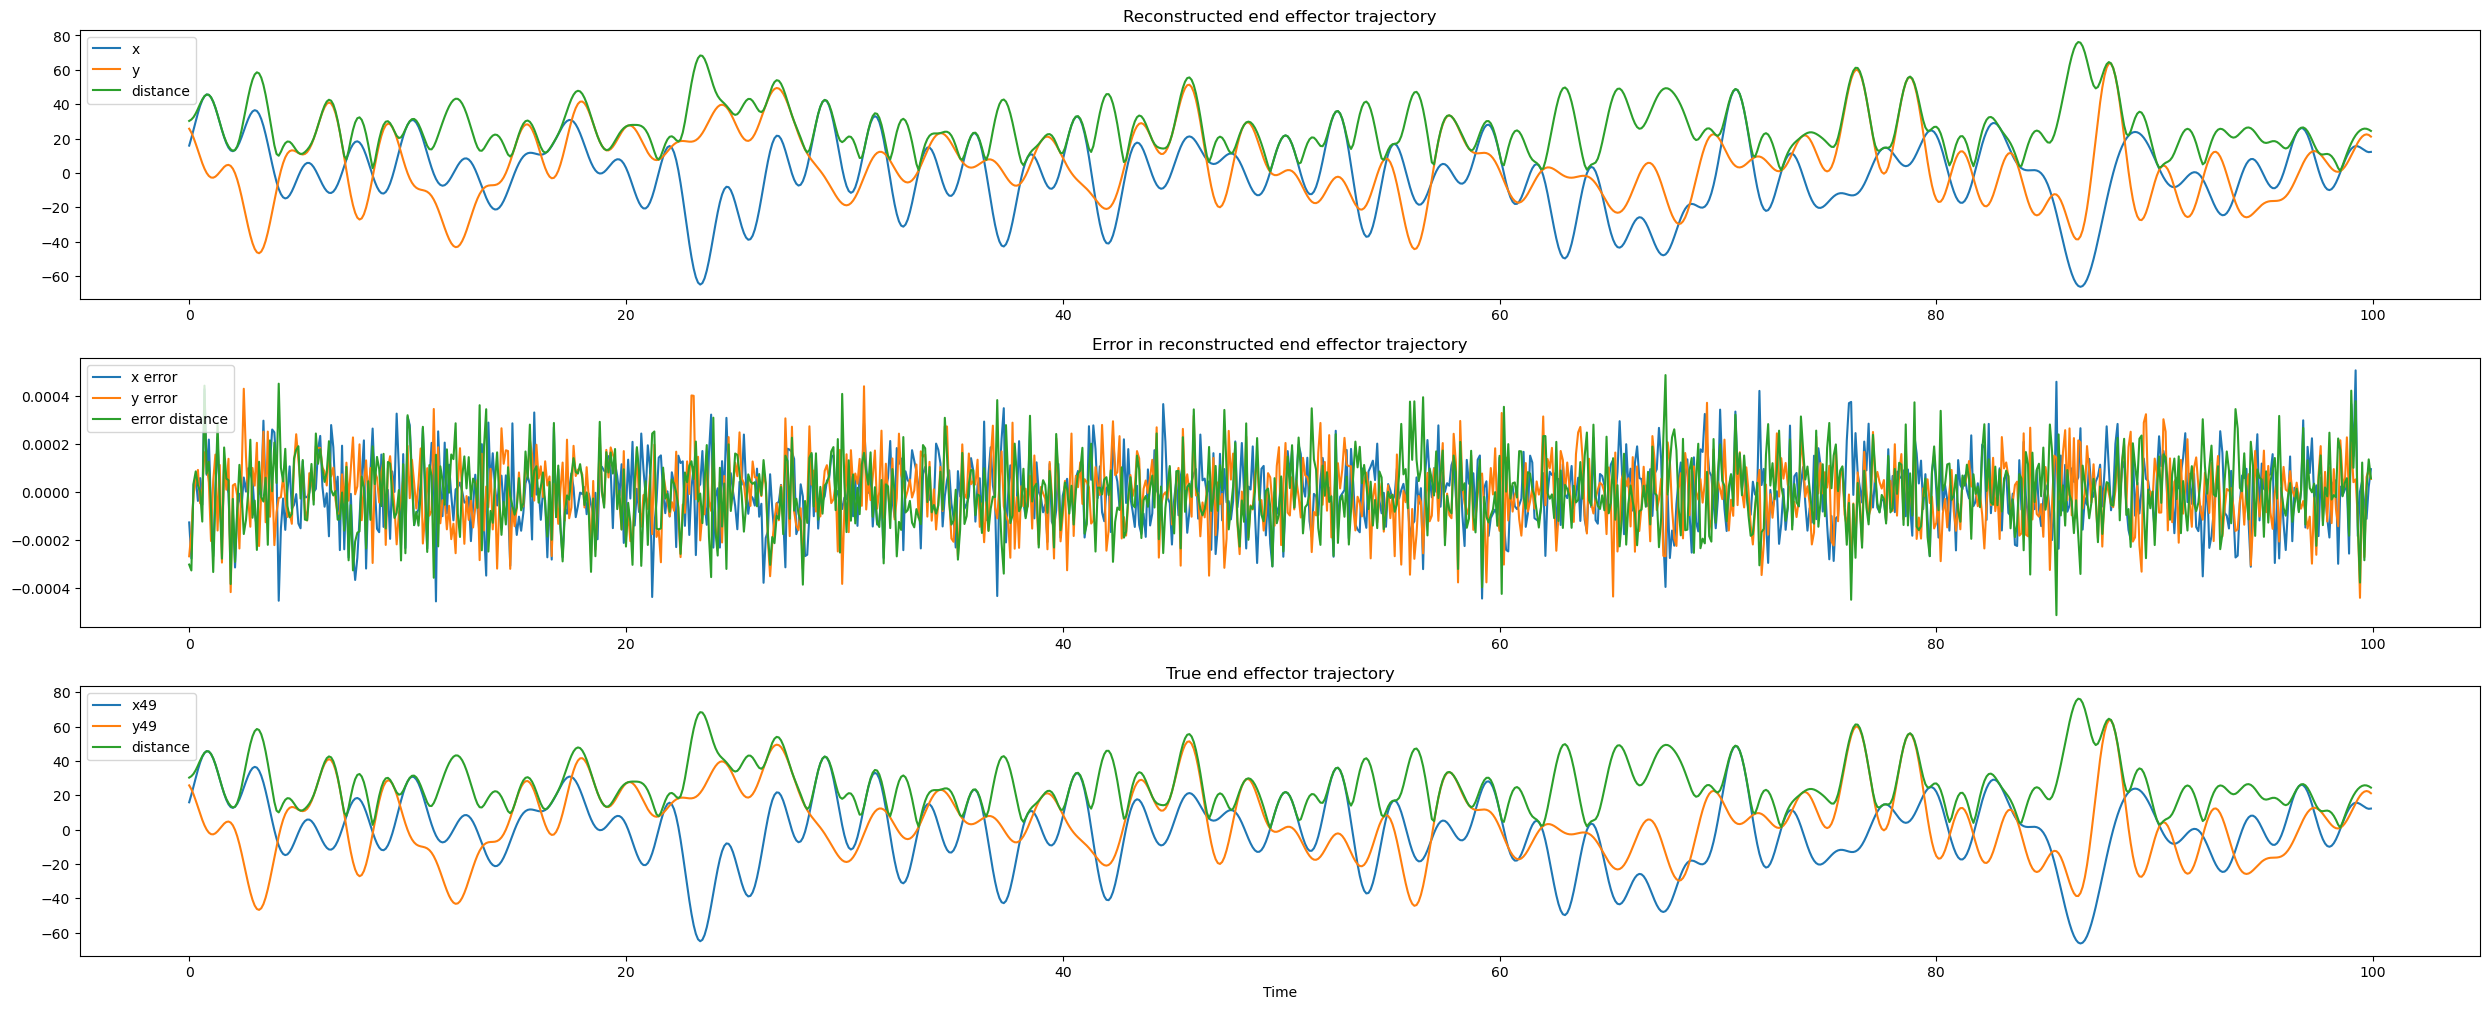

In [41]:
fig, ax = plt.subplots(figsize=(25, 10), ncols=1, nrows=3)
ax1, ax2, ax3 = ax

ax3.plot(df["time"], df[f"x{len(average_length_bar)-1}"], label = f"x{len(average_length_bar)-1}")
ax3.plot(df["time"], df[f"y{len(average_length_bar)-1}"], label = f"y{len(average_length_bar)-1}")
ax3.plot(df["time"], df["distance"], label = "distance")
ax3.legend(loc = "upper left")
ax3.set_title("True end effector trajectory")

others = ["x", "y", "distance"]
for header in others:
    ax1.plot(reconstruct["time"], reconstruct[header], label = header)
ax1.legend(loc = "upper left")
ax1.set_title("Reconstructed end effector trajectory")

error_list = ["x error", "y error", "error distance"]
for header in error_list:
    ax2.plot(reconstruct["time"], reconstruct[header], label = header)
ax2.legend(loc = "upper left")
ax2.set_title("Error in reconstructed end effector trajectory")

fig.tight_layout()
plt.xlabel("Time")
plt.show()

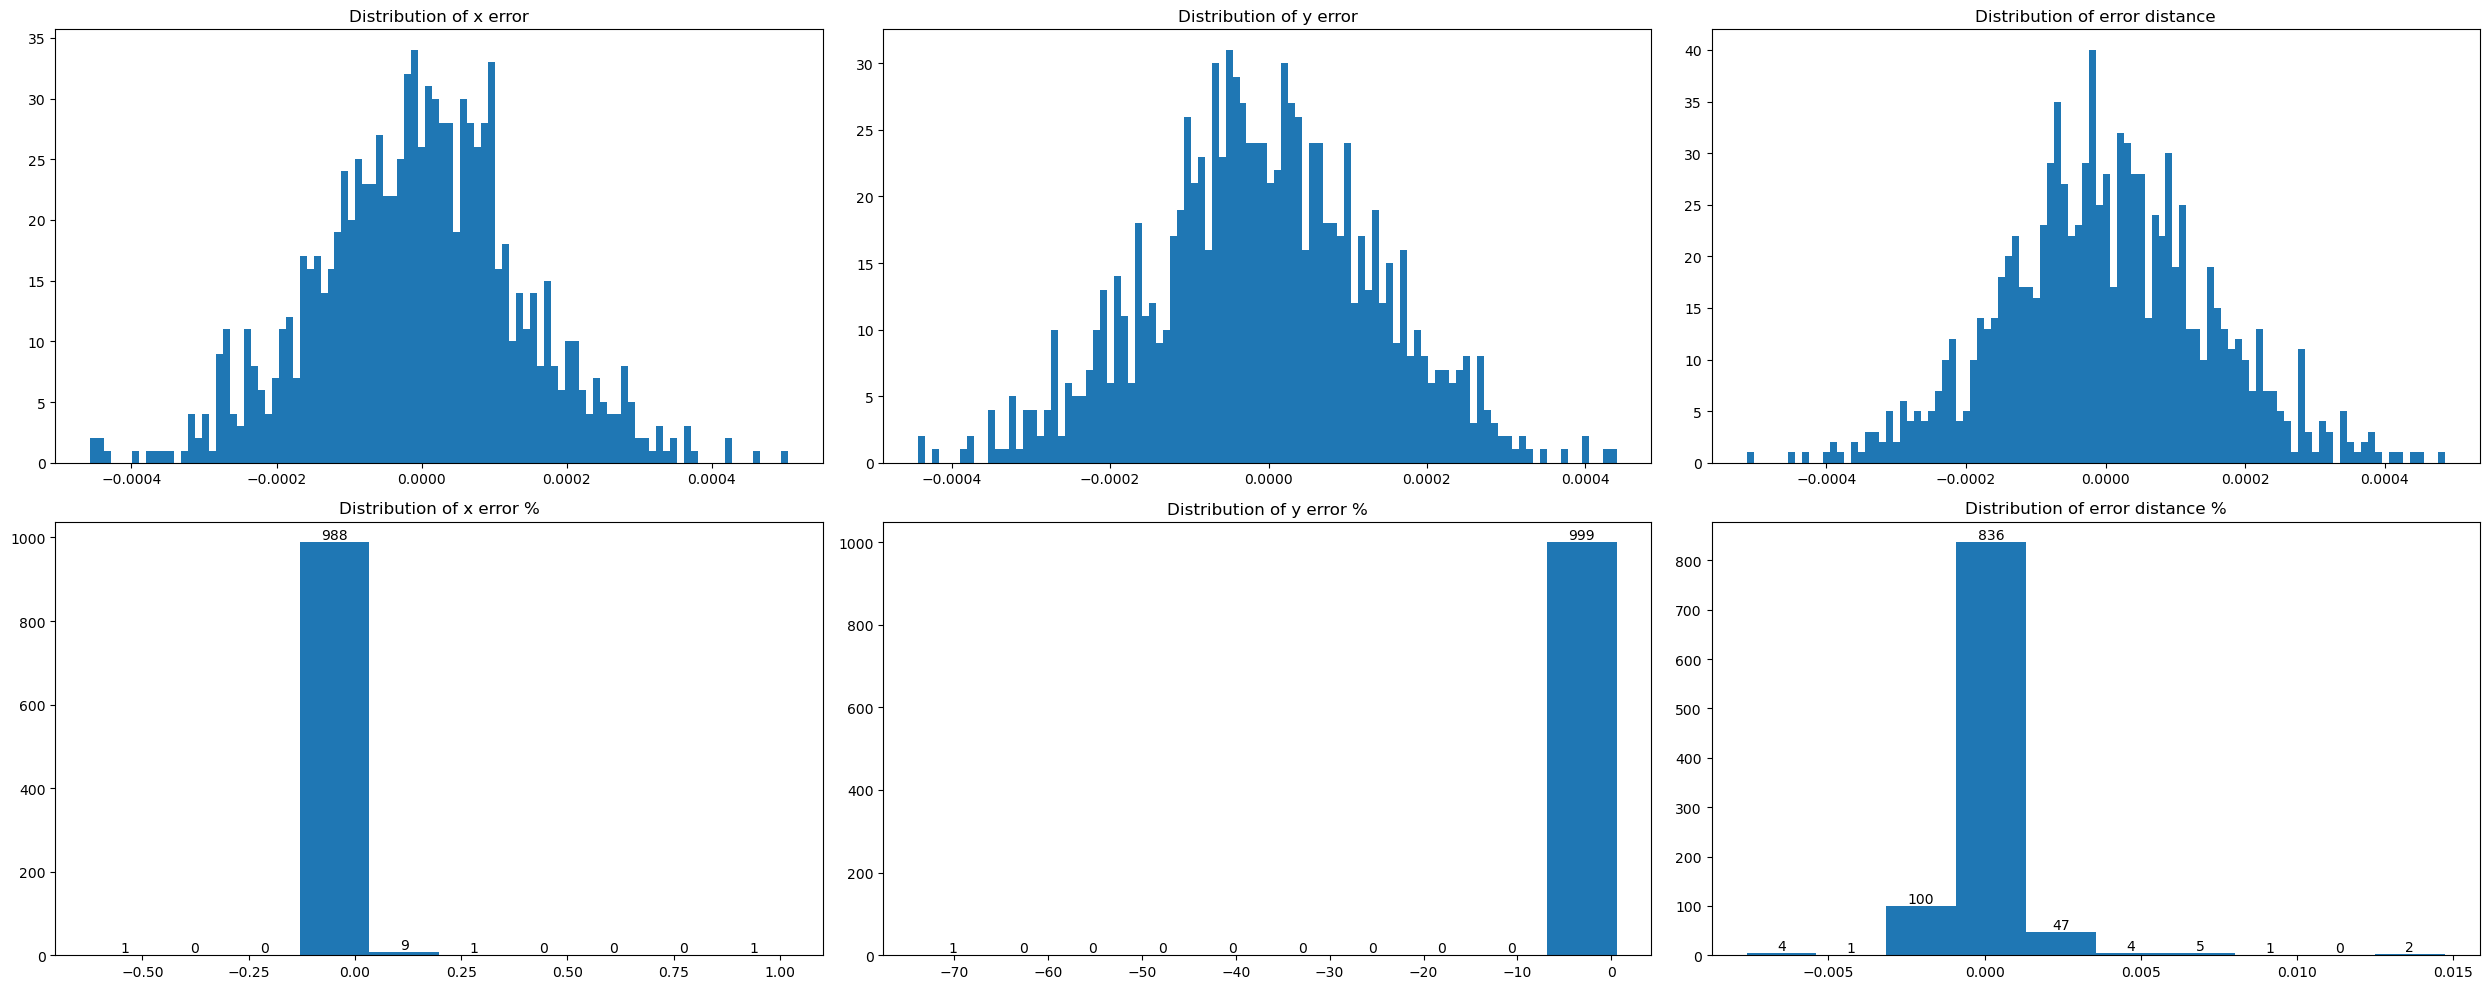

In [42]:
fig, ax = plt.subplots(figsize=(25, 10), ncols=3, nrows=2)

ax1, ax2, ax3 = ax[0]
ax4, ax5, ax6 = ax[1]

# Bar plot for error distribution
ax1.hist(reconstruct["x error"], bins=100)
ax1.set_title("Distribution of x error")

ax2.hist(reconstruct["y error"], bins=100)
ax2.set_title("Distribution of y error")

ax3.hist(reconstruct["error distance"], bins=100)
ax3.set_title("Distribution of error distance")

# Annotated histogram for error %
for axis, col, title in zip(
    [ax4, ax5, ax6],
    ["x error %", "y error %", "distance error %"],
    ["Distribution of x error %", "Distribution of y error %", "Distribution of error distance %"]
):
    n, bins, patches = axis.hist(reconstruct[col], bins=10)
    axis.set_title(title)

    # Annotate each bar with count
    for count, left, right in zip(n, bins[:-1], bins[1:]):
        x = (left + right) / 2
        axis.text(x, count, str(int(count)), ha="center", va="bottom", fontsize=10)

fig.tight_layout()
plt.show()


In [43]:
# Time and signals
t = df["time"].to_numpy()
x = df[f"x{len(average_length_bar)-1}"].to_numpy()
y = df[f"y{len(average_length_bar)-1}"].to_numpy()
distance = df["distance"].to_numpy()

num_samples = len(df)
num_phases = 9  # You can change this to any number of phases you want
samples_per_phase = num_samples // num_phases

# Create phase labels
phases = np.repeat(np.arange(1, num_phases + 1), samples_per_phase)

# Handle leftover samples (if any) by appending the last phase label
if len(phases) < num_samples:
    remaining = num_samples - len(phases)
    phases = np.append(phases, [num_phases] * remaining)

# Add to DataFrame
df["phase"] = phases

In [44]:
import matplotlib.gridspec as gridspec
from datetime import datetime
import os

def get_time_str(time = datetime.now()):
    time = time.timestamp()
    return datetime.fromtimestamp(time).strftime('%Y_%m_%d_%H_%M_%S_%f')

image_root = "bar_image/"
os.makedirs(image_root, exist_ok=True)

# Define figure and GridSpec with 3 rows and 6 columns (3 left, 3 right)
fig = plt.figure(figsize=(25, 12))
gs = gridspec.GridSpec(3, 6, figure=fig, wspace=0.4, hspace=0.6)

# Phase plots: occupy 3x3 slots on the left (columns 0–2)
phase_axes = [fig.add_subplot(gs[i, j]) for i in range(3) for j in range(3)]
phases = df["phase"].unique()

# Plot each phase into its subplot
for ax, phase in zip(phase_axes, phases):
    mask = df["phase"] == phase
    ax.plot(x[mask], y[mask], label=f"Phase {phase}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title(f"Phase {phase}")
    ax.legend(loc = 'upper right')

# Full trajectory plot: occupy all 3 rows of columns 3–5
full_ax = fig.add_subplot(gs[:, 3:6])  # rows all, columns 3 to 5 (inclusive)
for phase in phases:
    mask = df["phase"] == phase
    full_ax.plot(x[mask], y[mask], label=f"Phase {phase}")
full_ax.set_xlabel("x")
full_ax.set_ylabel("y")
full_ax.set_title("Full Trajectory")
full_ax.legend(loc = 'upper right')

plt.tight_layout()
plt.savefig(image_root + "trajectory_" + get_time_str() + ".png")
plt.close(fig)

C:\Users\dangs\AppData\Local\Temp\ipykernel_7260\1424427097.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [45]:
csv_file = []
root = "bar_data/"
for file in os.listdir(root):
    if file.endswith(".csv"):
        csv_file.append(file)

# exclude joint_angles.csv and joint_positions.csv
csv_file.remove("joint_angles.csv")
csv_file.remove("joint_positions.csv")

for index, file in enumerate(csv_file, start=1):
    print(f"{index}: {file}")

1: alternative_kalman1.csv
2: alternative_kalman2.csv
3: extended_kalman1.csv
4: extended_kalman2.csv
5: inverted_trajectory_component.csv
6: inverted_trajectory_position.csv
7: kalman1.csv
8: kalman2.csv
9: LQR1.csv
10: LQR2.csv
11: luenberger1.csv
12: luenberger2.csv
13: PID1.csv
14: PID2.csv


In [46]:
trajectory = pd.DataFrame()
trajectory["time"] = df["time"].astype(float)
trajectory["position"] = df["distance"].astype(float)
inverted_trajectory = pd.read_csv(root + "inverted_trajectory_position.csv")

for file in sorted(csv_file):
    if file.endswith("_component.csv") or file.endswith("_position.csv"):
        continue

    df = pd.read_csv(root + file)
    headers = list(df.columns)[1:]

    has_measured = "measured_position" in headers
    if has_measured:
        headers.remove("measured_position")
    
    # Title formatting
    terms = file.split(".")[0].split("_")
    title = " ".join(terms)
    last_char = title[-1]
    title = title[:-1]
    if not (title == 'PID' or title == 'LQR'):
        title = title.title()

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(figsize=(25, 11), ncols=1, nrows=2)

    # Subplot 1: Full trajectory and model estimates
    if last_char == "1":
        ax1.plot(trajectory["time"], trajectory["position"], label="Original Trajectory")
        title += " Original Trajectory"
    elif last_char == "2":
        ax1.plot(inverted_trajectory["time"], inverted_trajectory["position"], label="Reconstructed Trajectory")
        title += " Reconstructed Trajectory"

    for header in headers:
        ax1.plot(df["time"], df[header], label=header)

    ax1.set_xlabel("time")
    ax1.set_title(title + " - Modeling Trajectory")
    ax1.legend(loc="upper left")

    # Subplot 2: Selected signal(s)
    selected_headers = []
    if "PID" in title:
        selected_headers = [col for col in df.columns if any(k in col for k in ["error", "running"])]
    elif "Kalman" in title:
        selected_headers = [col for col in df.columns if any(k in col for k in ["predicted_position", "running"])]
    elif "LQR" in title:
        selected_headers = [col for col in df.columns if any(k in col for k in ["estimated_position"])]
    elif "Luenberger" in title:
        selected_headers = [col for col in df.columns if any(k in col for k in ["estimated_position"])]

    for header in selected_headers:
        ax2.plot(df["time"], df[header], label=header)

    if last_char == "1":
        ax2.plot(trajectory["time"], trajectory["position"], label="Original Trajectory")
    elif last_char == "2":
        ax2.plot(inverted_trajectory["time"], inverted_trajectory["position"], label="Reconstructed Trajectory")

    ax2.set_xlabel("time")
    ax2.set_title(title + " - Selected Signals")
    ax2.legend(loc="upper left")

    # Layout and show
    plt.tight_layout()
    plt.savefig(image_root + file[:-4] + "_" + get_time_str() + ".png")

    plt.close(fig)